In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
yelp_reviews = pd.read_json('yelp_academic_dataset_review.json', nrows = 1000000, lines = True)

In [3]:
yelp_reviews.describe()

,stars,useful,funny,cool
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,3.783959,1.106594,0.307812,0.457129
std,1.440197,2.848906,1.428185,1.799114
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,539.000000,284.000000,172.000000


In [4]:
yelp_reviews.dtypes

review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [5]:
yelp_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
# Check to see if users are reviewing multiple times.
group = yelp_reviews.groupby(["user_id", "business_id"])
count = group['review_id'].count()
sort = count.sort_values(ascending = False)


print(sort)

user_id                 business_id           
IiUGGCANINjDS4egim7eQw  Yv9KUZ-N3otoKUtToPPxAg    24
WVqS85AUR20gbSFkuKH8Ig  Zi-F-YvyVOK0k5QD7lrLOg    14
zv7tpu7xeaNyAeFG03d2CA  MFxRPt8-B2xTYmon3s84kg    13
f8WiVpa4b0TPmEFjEoEhfA  WZgfBnIvBZ2B7OWkyiOPUA    13
58zhqwfGYEl92MZusTsYJg  SZU9c8V2GuREDN5KgyHFJw    12
                                                  ..
KW0mxqMclwv9qf6__cX_3Q  7lwe7n-Yc-V9E_HfLAeylg     1
KW0vj_At7du6dXevWZHBRw  YqmClmk7oLcDzPWKHzgA-Q     1
KW1eDla4KyCuRepdmUPBHQ  nBR2-rNXMfERz-UOgjHC6A     1
                        xFco5W4qAV-bDOzkAon5sw     1
zzzCg-_lpyYE82TlJCdwdw  LttC5xNMFcgOg3bt_MlXTg     1
Name: review_id, Length: 968910, dtype: int64


In [7]:
# Drop duplcate reviewers of same business

yelp_reviews = yelp_reviews.drop_duplicates(["user_id", "business_id"])
yelp_reviews.describe()

,stars,useful,funny,cool
count,968910.000000,968910.000000,968910.000000,968910.000000
mean,3.788870,1.093224,0.304000,0.450118
std,1.437292,2.827444,1.419533,1.779071
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,539.000000,284.000000,172.000000


We can go ahead and drop the columns we don't need - "review_id", "useful", "funny", "cool"

In [8]:
yelp_reviews = yelp_reviews.drop(["review_id", "useful", "funny", "cool"], axis = 1)

yelp_reviews.head()

,user_id,business_id,stars,text,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Cursory review of the distribution of remaining data by stars assigned by reviewers.

<AxesSubplot:xlabel='stars', ylabel='count'>

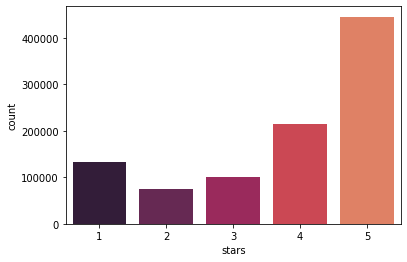

In [14]:
sns.set_palette('rocket')
sns.countplot(x = 'stars', data = yelp_reviews)

In [22]:
# We can also look at the stars distribution over the years

# sns.catplot(x = 'stars', col = yelp_reviews['date'].dt.year, data = yelp_reviews)
# sns.scatterplot(x = yelp_reviews['date'].dt.year, y = yelp_reviews['stars'])

In [13]:
! pip install wordcloud==1.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.2
    Uninstalling wordcloud-1.9.2:
      Successfully uninstalled wordcloud-1.9.2


In [23]:
# ! pip install --upgrade pip

# ! pip install --upgrade Pillow

In [24]:
# from wordcloud import WordCloud
# from wordcloud import STOPWORDS
# # import string

# stopwords = set(STOPWORDS)
    
# all_words = " ".join(review for review in yelp_reviews['text'])

# wordcloud = WordCloud(stopwords = stopwords).generate(all_words)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Start to build out the nlp model

In [ ]:

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


In [27]:
# First, clean out the punctuation stop words from the data.

def clean_text(review):
    remove_punctuation = [word for word in review if word not in string.punctuation]
    remove_punctuation = ''.join(remove_punctuation)
    return [word.lower() for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

yelp_cleaned = yelp_reviews.copy()
yelp_cleaned['text'] = yelp_cleaned['text'].apply(clean_text)

yelp_cleaned.head()
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/peachesncrmcrm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,business_id,stars,text,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"[decide, eat, aware, going, take, 2, hours, be...",2018-07-07 22:09:11
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,"[ive, taken, lot, spin, classes, years, nothin...",2012-01-03 15:28:18
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,"[family, diner, buffet, eclectic, assortment, ...",2014-02-05 20:30:30
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"[wow, yummy, different, delicious, favorite, l...",2015-01-04 00:01:03
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,"[cute, interior, owner, gave, us, tour, upcomi...",2017-01-14 20:54:15


In [34]:
! git add Project_2.ipynb

In [39]:
#! git config

In [41]:
# always add, commit, push

! git commit -m "adding project_2"

[Alonna (root-commit) 38b4dde] adding project_2
 1 file changed, 888 insertions(+)
 create mode 100644 4447/Project_2.ipynb


In [40]:
 ! git config --global user.email "alonna.guerrero@du.com"
 ! git config --global user.name "lonnagee"

In [47]:
# adding my branch of project tree 
! git remote add origin https://github.com/lonnagee/4447-Project/tree/Main

fatal: remote origin already exists.


In [51]:
! git push --set-upstream origin Alonna

fatal: repository 'https://github.com/lonnagee/4447-Project/tree/Alonna/' not found
